# FRETBursts - 8-spot smFRET burst analysis

*This notebook is part of a [tutorial series](https://github.com/tritemio/FRETBursts_notebooks) for the [FRETBursts](http://tritemio.github.io/FRETBursts/) burst analysis software.*

> For a step-by-step introduction to FRETBursts usage please refer to 
> [us-ALEX smFRET burst analysis](FRETBursts - us-ALEX smFRET burst analysis.ipynb).
>
> In this notebook we present a typical [FRETBursts](http://tritemio.github.io/FRETBursts/)
> workflow for **multi-spot smFRET burst analysis**. 
> Briefly, we show how to perform background estimation, burst search, burst selection, 
> FRET histograms, and FRET efficiency fit using different methods. 

## Loading the software

In [1]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.


--------------------------------------------------------------
 You are running FRETBursts (version 0.5.7+0.g7267863.dirty).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


In [2]:
sns = init_notebook()

In [3]:
import lmfit; lmfit.__version__

'0.9.5'

In [4]:
import phconvert; phconvert.__version__

'0.7.1'

# Downloading the sample data file

The complete example dataset can be downloaded 
from [here](http://dx.doi.org/10.6084/m9.figshare.1019906).

Here we download an 8-spot smFRET measurement file using 
the `download_file` in FRETBursts: 

In [5]:
url = 'http://files.figshare.com/2182604/12d_New_30p_320mW_steer_3.hdf5'

In [6]:
download_file(url, save_dir='./data')

URL:  http://files.figshare.com/2182604/12d_New_30p_320mW_steer_3.hdf5
File: 12d_New_30p_320mW_steer_3.hdf5
 
File already on disk: /Users/anto/src/FRETBursts/notebooks/data/12d_New_30p_320mW_steer_3.hdf5 
Delete it to re-download.


# Selecting a data file

In [7]:
filename = "./data/12d_New_30p_320mW_steer_3.hdf5"

In [8]:
import os
assert os.path.exists(filename)

## Data load and Burst search

Load and process the data:

In [9]:
d = loader.photon_hdf5(filename)

For convenience we can set the correction coefficients right away 
so that they will be used in the subsequent analysis. 
The correction coefficients are: 

* leakage or bleed-through: `leakage`
* direct excitation: `dir_ex` (ALEX-only)
* gamma-factor `gamma`

The direct excitation cannot be applied to non-ALEX (single-laser) 
smFRET measurements (like the current one).

In [10]:
d.leakage = 0.038
d.gamma = 0.43

> **NOTE:** at any later moment, after burst search, a simple 
> reassignment of these coefficient will update the burst data 
> with the new correction values.

Compute background and burst search:

In [11]:
d.calc_bg(bg.exp_fit, time_s=30, tail_min_us='auto', F_bg=1.7)
d.burst_search(L=10, m=10, F=7)

 - Calculating BG rates ... 

[DONE]


 - Performing burst search (verbose=False) ...

[DONE]


 - Calculating burst periods ...

[DONE]


 - Counting D and A ph and calculating FRET ... 


   - Applying background correction.


   - Applying leakage correction.


   [DONE Counting D/A]


Perform a background plot as a function of the channel:

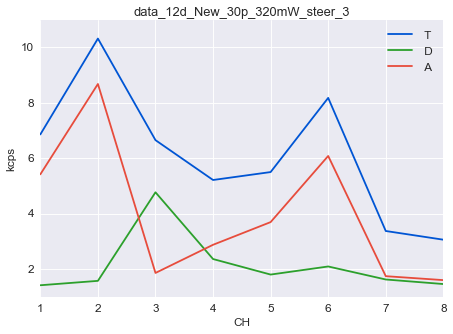

In [12]:
mch_plot_bg(d)

Let's take a look at the photon waiting times histograms and at the fitted background rates:

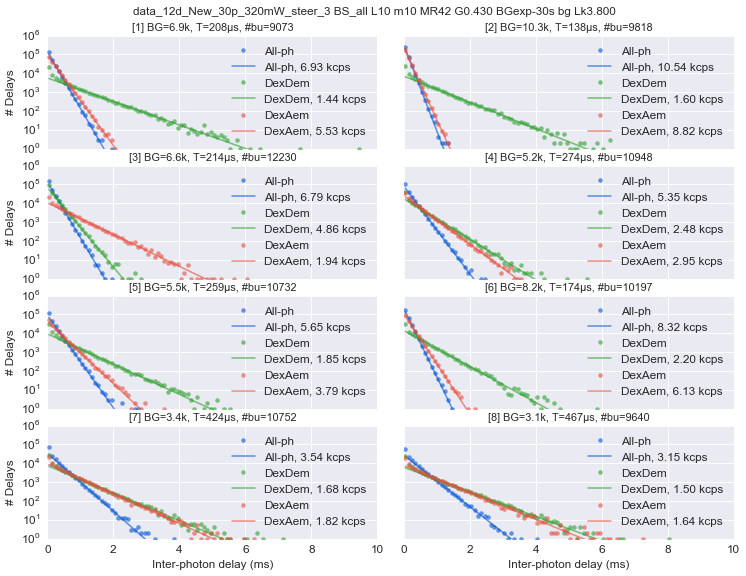

In [13]:
dplot(d, hist_bg);

Using `dplot` exactly in the same way as for the single-spot 
data has now generated 8 subplots, one for each channel.

Let's plot a timetrace for the background to see is there 
are significant variations during the measurement:

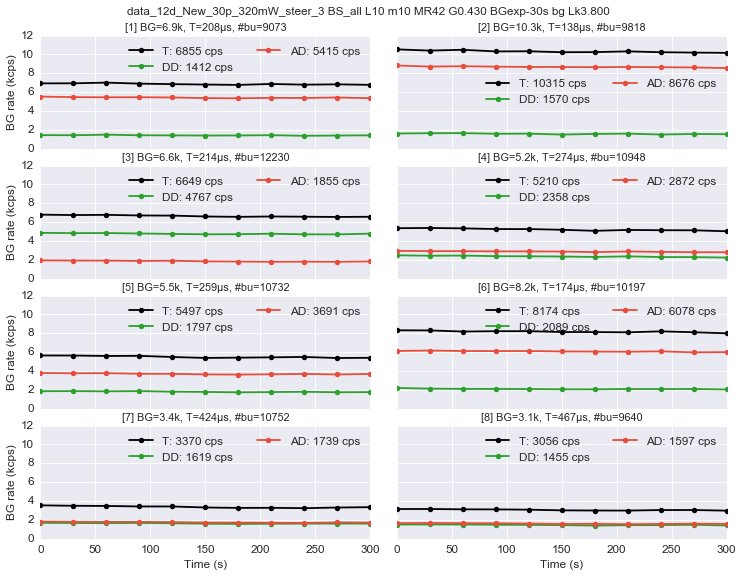

In [14]:
dplot(d, timetrace_bg);

We can look at the timetrace of the photon stream (binning):

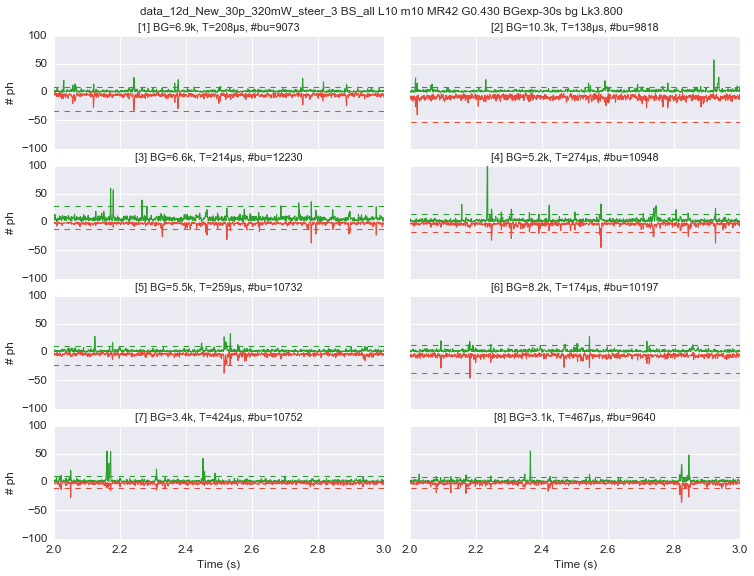

In [15]:
dplot(d, timetrace)
xlim(2, 3); ylim(-100, 100);

We can also open the same plot in an interactive window that allows scrolling (uncomment the following lines):

In [16]:
#%matplotlib qt

In [17]:
#dplot(d, timetrace, scroll=True);

In [18]:
#ylim(-100, 100)

In [19]:
#%matplotlib inline

## Burst selection and FRET

### Selecting bursts by burst size (`select_bursts.size`)

In [20]:
gamma = d.gamma
gamma

array(0.43)

/Users/anto/miniconda3/lib/python3.5/site-packages/fretbursts/burstlib.py:2114: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 9818 but corresponding boolean dimension is 9073
  ds[name][ich] = self[name][ich][mask]
/Users/anto/miniconda3/lib/python3.5/site-packages/fretbursts/burstlib.py:2114: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 12230 but corresponding boolean dimension is 9073
  ds[name][ich] = self[name][ich][mask]
/Users/anto/miniconda3/lib/python3.5/site-packages/fretbursts/burstlib.py:2114: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10948 but corresponding boolean dimension is 9073
  ds[name][ich] = self[name][ich][mask]
/Users/anto/miniconda3/lib/python3.5/site-packages/fretbursts/burstlib.py:2114: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10732 b

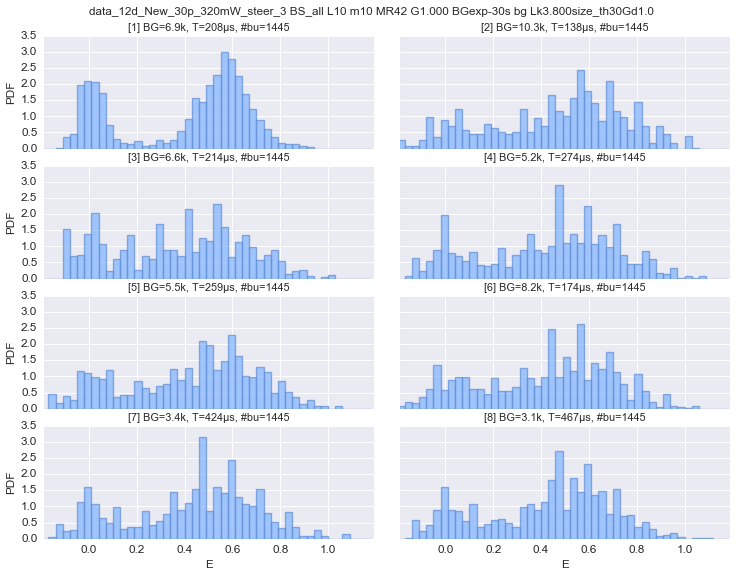

In [21]:
d.gamma = 1
ds = d.select_bursts(select_bursts.size, th1=30, gamma=1)
dplot(ds, hist_fret);

/Users/anto/miniconda3/lib/python3.5/site-packages/fretbursts/burstlib.py:2114: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 9818 but corresponding boolean dimension is 9073
  ds[name][ich] = self[name][ich][mask]
/Users/anto/miniconda3/lib/python3.5/site-packages/fretbursts/burstlib.py:2114: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 12230 but corresponding boolean dimension is 9073
  ds[name][ich] = self[name][ich][mask]
/Users/anto/miniconda3/lib/python3.5/site-packages/fretbursts/burstlib.py:2114: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10948 but corresponding boolean dimension is 9073
  ds[name][ich] = self[name][ich][mask]
/Users/anto/miniconda3/lib/python3.5/site-packages/fretbursts/burstlib.py:2114: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10732 b

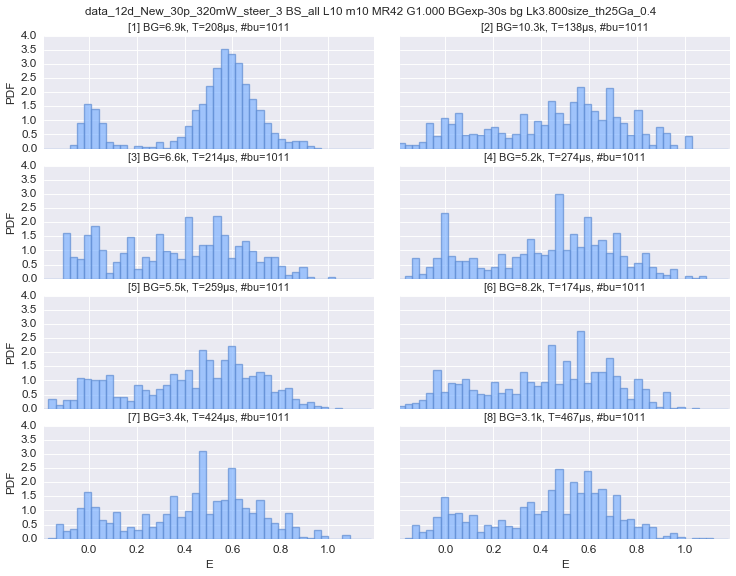

In [22]:
ds = d.select_bursts(select_bursts.size, th1=25, gamma=gamma, donor_ref=False)
dplot(ds, hist_fret);

/Users/anto/miniconda3/lib/python3.5/site-packages/fretbursts/burstlib.py:2114: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 9818 but corresponding boolean dimension is 9073
  ds[name][ich] = self[name][ich][mask]
/Users/anto/miniconda3/lib/python3.5/site-packages/fretbursts/burstlib.py:2114: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 12230 but corresponding boolean dimension is 9073
  ds[name][ich] = self[name][ich][mask]
/Users/anto/miniconda3/lib/python3.5/site-packages/fretbursts/burstlib.py:2114: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10948 but corresponding boolean dimension is 9073
  ds[name][ich] = self[name][ich][mask]
/Users/anto/miniconda3/lib/python3.5/site-packages/fretbursts/burstlib.py:2114: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10732 b

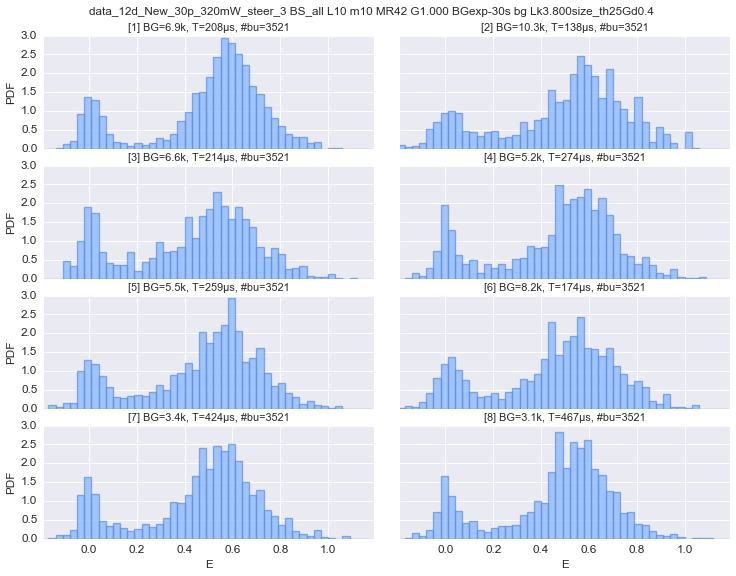

In [23]:
ds = d.select_bursts(select_bursts.size, th1=25, gamma=gamma)
dplot(ds, hist_fret, weights='size', gamma=gamma);

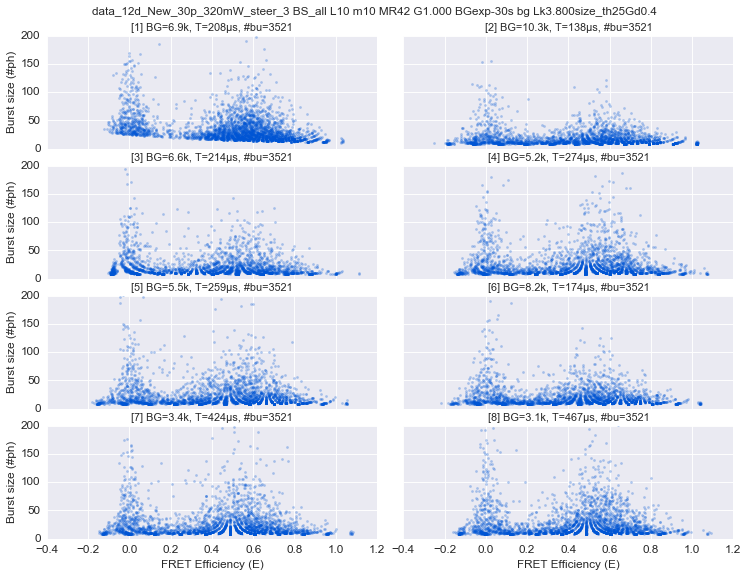

In [24]:
dplot(ds, scatter_fret_nd_na); ylim(0,200);

## FRET Fitting

### 2-Gaussian mixture

Let's fit the $E$ histogram with a 2-Gaussians model:

In [25]:
ds.gamma = 1.
bext.bursts_fitter(ds, weights=None)
ds.E_fitter.fit_histogram(mfit.factory_two_gaussians(), verbose=False)

The fitted parameters are stored in a pandas DataFrame:

In [26]:
ds.E_fitter.params

,p1_amplitude,p1_center,p1_sigma,p2_amplitude,p2_center,p2_sigma
0,0.161092,0.0148174,0.0551037,0.827499,0.587952,0.14408
1,0.243272,0.0323764,0.11476,0.763416,0.584405,0.190855
2,0.249805,0.00518158,0.0728283,0.742059,0.498093,0.2
3,0.213433,0.0087562,0.075682,0.786335,0.541668,0.191265
4,0.214548,0.0233083,0.0879623,0.789166,0.549135,0.189851
5,0.219882,0.022783,0.0921309,0.788298,0.534499,0.196293
6,0.202031,0.00635976,0.0719399,0.793649,0.530005,0.1815
7,0.225964,0.0201277,0.0872862,0.775101,0.529871,0.173377


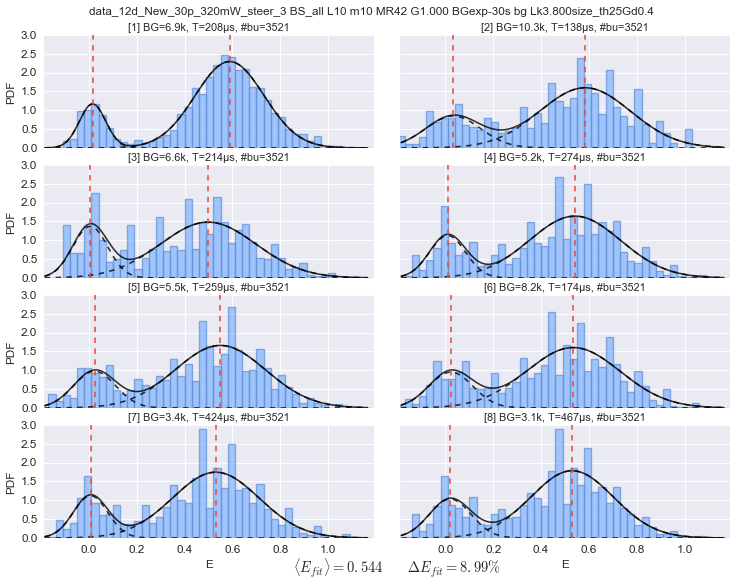

In [27]:
dplot(ds, hist_fret, weights=None, show_model=True,
      show_fit_stats=True, fit_from='p2_center');

### Weighted Expectation Maximization

The [expectation maximization](http://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) 
(EM) method is particularly suited to resolve population 
mixtures. Note that the EM algorithm does not fit the histogram 
but the $E$ distribution with no binning.

FRETBursts include a weighted version of the EM algorithm that 
can take into account the burst size.
The algorithm and benchmarks with the 2-Gaussian histogram fit 
are reported [here](http://nbviewer.ipython.org/github/tritemio/notebooks/blob/master/Mixture_Model_Fitting.ipynb).

You can find the EM algorithm in `fretbursts/fit/gaussian_fit.py` or typing:

`bl.two_gaussian_fit_EM??`


In [28]:
# bl.two_gaussian_fit_EM??

In [29]:
EM_results = ds.fit_E_two_gauss_EM(weights=None, gamma=1.)
EM_results

array([ 0.59046771,  0.57859121,  0.48333485,  0.53726854,  0.53746748,
        0.53377769,  0.52993168,  0.52638749])

The fitted parameters for each channel are stored in the `fit_E_res` attribute:

In [30]:
ds.fit_E_name, ds.fit_E_res

('two_gaussian_fit_EM',
 array([[ 0.01828333,  0.05429796,  0.59046771,  0.1511474 ,  0.16027388],
        [ 0.03593187,  0.105155  ,  0.57859121,  0.19173069,  0.23194006],
        [ 0.00411751,  0.06524499,  0.48333485,  0.2099456 ,  0.23111992],
        [ 0.01194174,  0.07808016,  0.53726854,  0.19019607,  0.21409832],
        [ 0.02108472,  0.08725666,  0.53746748,  0.18841171,  0.20879181],
        [ 0.0272828 ,  0.08955257,  0.53377769,  0.18939203,  0.22073731],
        [ 0.01182194,  0.07304491,  0.52993168,  0.18561834,  0.20130064],
        [ 0.02052109,  0.08209915,  0.52638749,  0.17764741,  0.21518299]]))

The model function is stored in:

In [31]:
ds.fit_E_model

<function fretbursts.fit.gaussian_fitting.two_gauss_mix_pdf>

Let's plot the histogram and the model with parameters from the EM fit:

E mean: 53.97%   E delta: 10.71%


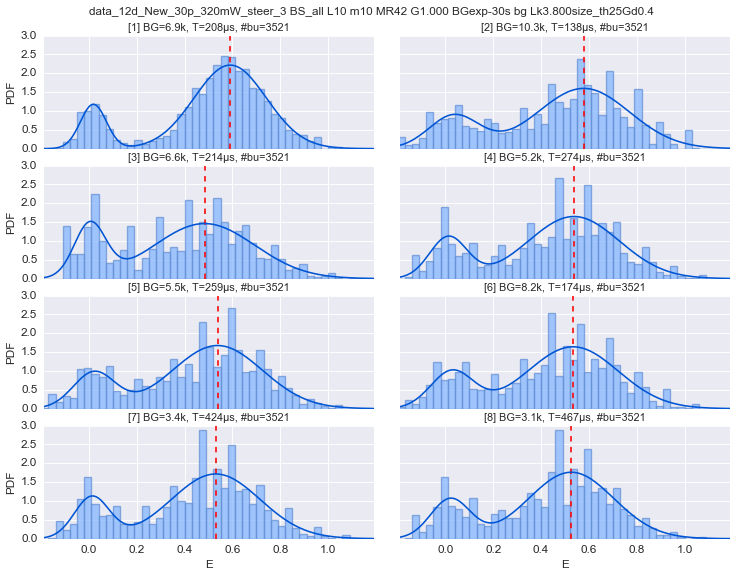

In [32]:
AX = dplot(ds, hist_fret, weights=None)

x = np.r_[-0.2: 1.2 : 0.01]
for ich, (ax, E_fit) in enumerate(zip(AX.ravel(), EM_results)):
    ax.axvline(E_fit, ls='--', color='r')
    ax.plot(x, ds.fit_E_model(x, ds.fit_E_res[ich]))

print('E mean: %.2f%%   E delta: %.2f%%' %\
      (EM_results.mean()*100, (EM_results.max() - EM_results.min())*100))

## Comparing 2-Gaussian and EM fit

To quickly compare the 2-Gaussians with the EM fit we convert the EM fit results in a DataFrame:

In [33]:
import pandas as pd

In [34]:
EM_results = pd.DataFrame(ds.fit_E_res, columns=['p1_center', 'p1_sigma', 'p2_center', 'p2_sigma', 'p1_amplitude'])
EM_results * 100

,p1_center,p1_sigma,p2_center,p2_sigma,p1_amplitude
0,1.828333,5.429796,59.046771,15.114740,16.027388
1,3.593187,10.515500,57.859121,19.173069,23.194006
2,0.411751,6.524499,48.333485,20.994560,23.111992
3,1.194174,7.808016,53.726854,19.019607,21.409832
4,2.108472,8.725666,53.746748,18.841171,20.879181
5,2.728280,8.955257,53.377769,18.939203,22.073731
6,1.182194,7.304491,52.993168,18.561834,20.130064
7,2.052109,8.209915,52.638749,17.764741,21.518299


In [35]:
ds.E_fitter.params * 100

,p1_amplitude,p1_center,p1_sigma,p2_amplitude,p2_center,p2_sigma
0,16.1092,1.48174,5.51037,82.7499,58.7952,14.408
1,24.3272,3.23764,11.476,76.3416,58.4405,19.0855
2,24.9805,0.518158,7.28283,74.2059,49.8093,20
3,21.3433,0.87562,7.5682,78.6335,54.1668,19.1265
4,21.4548,2.33083,8.79623,78.9166,54.9135,18.9851
5,21.9882,2.2783,9.21309,78.8298,53.4499,19.6293
6,20.2031,0.635976,7.19399,79.3649,53.0005,18.15
7,22.5964,2.01277,8.72862,77.5101,52.9871,17.3377


And we compute the difference between the two sets of parameters:

In [36]:
(ds.E_fitter.params - EM_results) * 100

,p1_amplitude,p1_center,p1_sigma,p2_amplitude,p2_center,p2_sigma
0,0.0818351,-0.346594,0.0805746,NaN,-0.251606,-0.706752
1,1.13317,-0.355548,0.960517,NaN,0.581415,-0.087593
2,1.86848,0.106408,0.758329,NaN,1.47582,-0.99456
3,-0.0665719,-0.318555,-0.239819,NaN,0.439975,0.106869
4,0.575587,0.22236,0.0705602,NaN,1.16672,0.143928
5,-0.0855696,-0.44998,0.257837,NaN,0.0720992,0.6901
6,0.0729993,-0.546218,-0.1105,NaN,0.00730423,-0.411832
7,1.07814,-0.0393341,0.518705,NaN,0.348385,-0.427034


> **NOTE:** The EM method follows more the "asymmetry" of the 
> peaks because the center is a weighted mean of the bursts. 
> On the contrary the 2-Gaussians histogram fit tends to follows 
> more the peak position an less the "asymmetric" tails.  